In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dataframe_exercicio_modulo_9.csv")
df

,sex,age,famsize,Pstatus,traveltime,studytime,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,absences,G3
0,F,18,GT3,A,2,2,yes,no,no,no,no,no,4,3,4,6,6
1,F,17,GT3,T,1,2,no,yes,no,no,yes,no,5,3,3,4,6
2,F,15,LE3,T,1,2,yes,no,yes,no,yes,no,4,3,2,10,10
3,F,15,GT3,T,1,3,no,yes,yes,yes,yes,yes,3,2,2,2,15
4,F,16,GT3,T,1,2,no,yes,yes,no,no,no,4,3,2,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,F,19,GT3,T,1,3,no,no,no,yes,yes,no,5,4,2,4,10
1040,F,18,LE3,T,1,2,no,yes,no,no,yes,no,4,3,4,4,16
1041,F,18,GT3,T,2,2,no,no,no,yes,no,no,1,1,1,6,9
1042,M,17,LE3,T,2,1,no,no,no,no,yes,no,2,4,5,6,10


Atributos do dataset:
    
    1- 'sex': sexo
    
    2- 'age': idade
    
    3- 'famsize': tamanho da família; LE3 - famílias com no máximo 3 pessoas, GT3 caso contrário
    
    4- 'Pstatus': status de habitação com os pais; T - mora junto com os pais, A - mora separado;
    
    5- 'traveltime': tempo de viagem entre escola e casa; 
        1 - <15 min., 2 - 15 a 30 min., 3 - 30 min. a 1 hora, or 4 - >1 hora
        
    6- 'studytime': tempo de estudo semanal; 1 - <2 horas, 2 - 2 a 5 horas, 3 - 5 a 10 horas, ou 4 - >10 horas
    
    7- 'schoolsup': suporte educacional extra escola
    
    8- 'famsup': suporte educacional da família
    
    9- 'paid': pagou aulas particulares por fora 
    
    10- 'activities': atividades extra-curriculares
    
    11- 'internet': acesso a internet em casa
    
    12- 'romantic': se está num relacionamento
    
    13- 'famrel': qualidade das relações familiares; 1 - muito ruim a 5 - muito boa
    
    14- 'freetime': tempo livre após escola; 1 - muito pouco até 5 - muito
    
    15- 'goout': relaciona-se com amigos; 1 - muito pouco até 5 - muito
    
    16- 'absences': quantidade de faltas na escola
    
    17- 'G3': nota média final no ensino médio
    
<br>

No dataset acima, faça uma __análise exploratória__ geral, bem como __pré-processamentos__ nas variáveis.

Considere a variável __'G3'__ como a __variável target__ do problema - contexto de __regressão.__

Teste __diferentes modelos de regressão__ a fim de explicar a variável target. Use a metodologia da __validação cruzada__ e o __coeficiente de determinação ($R^{2}$)__ como métrica de performance.

Plote __gráficos__ personalizados com os resultados.

In [3]:
df.isnull().sum()

sex           0
age           0
famsize       0
Pstatus       0
traveltime    0
studytime     0
schoolsup     0
famsup        0
paid          0
activities    0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
absences      0
G3            0
dtype: int64

#### O dataset não possui valores faltantes, algo que é bem positivo para nossa análise. Vamos agora dividí-lo em treino e teste.

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
dftrain, dftest = train_test_split(df, test_size = 0.25, random_state = 0)
print(df.shape)
print(dftrain.shape)
print(dftest.shape)

(1044, 17)
(783, 17)
(261, 17)


In [6]:
notas = sorted(dftrain['G3'].unique())
notas

[0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

#### Vemos acima que as possíveis notas são no intervalo de 0 a 20.

#### A análise inicial consiste em entender qual a influência de outras variáveis no valor de G3. Para isso, vamos ver a correlação entre elas:

In [7]:
dftrain.corr()['G3']

age          -0.109419
traveltime   -0.117219
studytime     0.144868
famrel        0.082302
freetime     -0.038788
goout        -0.060792
absences     -0.016700
G3            1.000000
Name: G3, dtype: float64

#### Inicialmente percebemos que as variáveis Studytime, Age e Traveltime se destacaram. Vamos iniciar nossa análise focando nelas. 

## Studytime

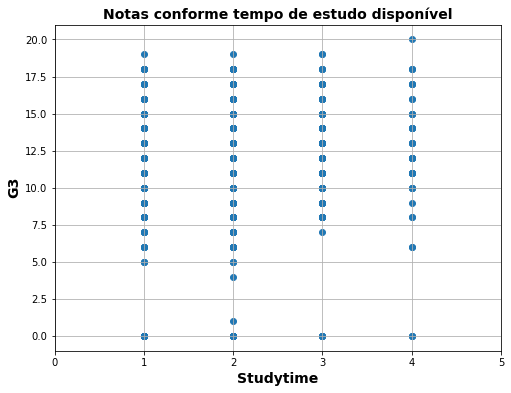

In [32]:
studytime_range = len(dftrain.studytime.unique())

plt.figure(figsize=[8,6])
plt.scatter(dftrain.studytime, dftrain.G3, )
plt.xlabel("Studytime", fontsize = 14, fontweight = 'bold')
plt.ylabel("G3", fontsize = 14, fontweight = 'bold')
plt.xlim(0,1+studytime_range)
plt.title("Notas conforme tempo de estudo disponível", fontsize=14, fontweight = 'bold')

plt.grid()
plt.show()

#### Através da dispersão dos pontos, podemos ver que os alunos com tempo de estudo classificados em 3 e 4 estão concentrados um pouco mais acima na ranking de notas. Os que estão classificados entre 1 e 2 tem uma concentração maior na parte de baixo do gráfico.

In [33]:
for i in dftrain.studytime.unique():
    x= dftrain.studytime[(df.G3>=10) & (df.studytime==i)].value_counts()/dftrain.studytime[df.studytime==i].value_counts()
    print(round(x*100))

1    74.0
Name: studytime, dtype: float64
2    75.0
Name: studytime, dtype: float64
3    84.0
Name: studytime, dtype: float64
4    83.0
Name: studytime, dtype: float64


#### Vemos acima que os alunos que estão classificados com studytime entre 3 e 4 tem um percentual maior na metade superior do gráfico, comprovando a análise gráfica.

## Age

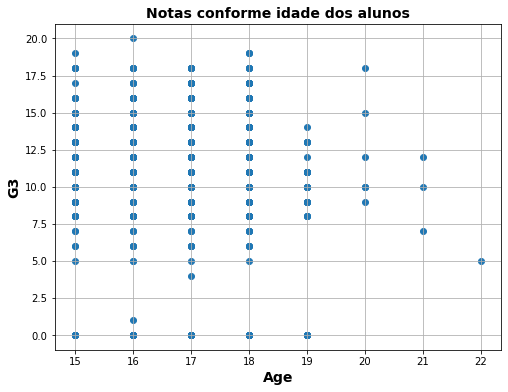

In [34]:
plt.figure(figsize=[8,6])
plt.scatter(dftrain.age, dftrain.G3)
plt.xlabel("Age", fontsize = 14, fontweight = 'bold')
plt.ylabel("G3", fontsize = 14, fontweight = 'bold')
plt.title("Notas conforme idade dos alunos", fontsize=14, fontweight = 'bold')

plt.grid()
plt.show()

In [35]:
alunos_ate_18 = dftrain.age[dftrain.age<=18].value_counts().sum()
alunos_18_22 =  dftrain.age[(dftrain.age>18) & (dftrain.age<=22)].value_counts().sum()

print('Há',alunos_ate_18,'alunos com idade até 18 anos na base de dados.')
print('Há',alunos_18_22,'alunos com idade entre 18 e 22 anos na base de dados.')

print('Alunos com até 18 anos representam',round((alunos_ate_18/dftrain.shape[0])*100,2),'% do total.')

Há 734 alunos com idade até 18 anos na base de dados.
Há 49 alunos com idade entre 18 e 22 anos na base de dados.
Alunos com até 18 anos representam 93.74 % do total.


#### A idade demonstrou que há uma concentração maior de notas boas até 18 anos, porém está concentração se deve ao fato de termos uma enorme maioria de alunos até 18 anos na base, representando mais de 90% do total. Considerando apenas esta maioria, não da para afirmarmos claramente que a idade doi crucial para notas maiores ou menores.

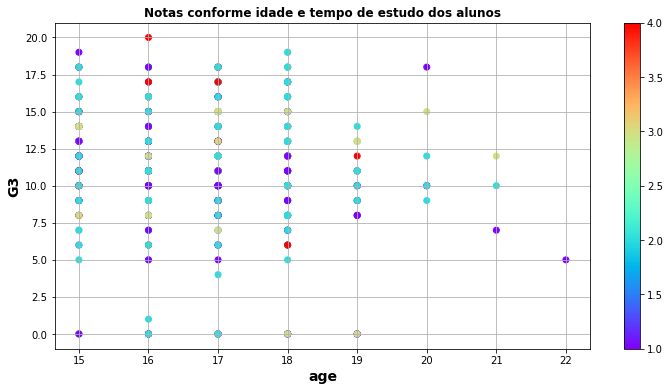

In [36]:
plt.figure(figsize=[12,6])
plt.scatter(dftrain.age, dftrain.G3,c = dftrain.studytime, cmap = plt.cm.rainbow)
plt.xlabel("age", fontsize = 14, fontweight = 'bold')
plt.ylabel("G3", fontsize = 14, fontweight = 'bold')
plt.title("Notas conforme idade e tempo de estudo dos alunos", fontsize=12, fontweight = 'bold')

plt.colorbar()
plt.grid()
plt.show()

#### Nesse gráfico, vemos que os alunos conforme a idade aumenta vão tendo cada vez menos tempo de estudos, o que faz muito sentido com a realidade. Isso pode justificar as notas mais baixas acima dos 18 anos.

## Traveltime

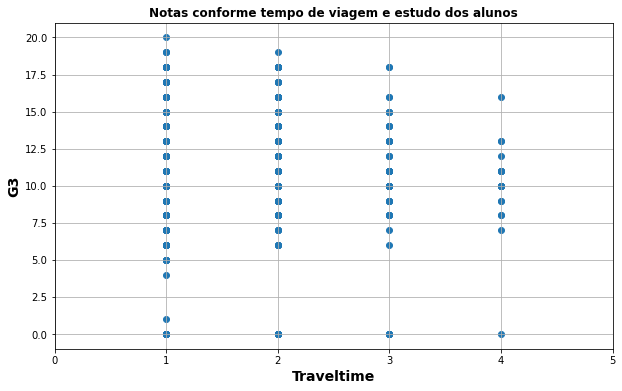

In [37]:
traveltime_range = len(dftrain.traveltime.unique())

plt.figure(figsize=[10,6])
plt.scatter(dftrain.traveltime, dftrain.G3)
plt.xlabel("Traveltime", fontsize = 14, fontweight = 'bold')
plt.ylabel("G3", fontsize = 14, fontweight = 'bold')
plt.title("Notas conforme tempo de viagem e estudo dos alunos", fontsize=12, fontweight = 'bold')
plt.xlim(0,1+traveltime_range)

plt.grid()
plt.show()

#### A análise por tempo de viagem foi mais conclusiva, mostrando uma concentração maior de notas boas para alunos que viajam menos. Isso nos da um norte para seguirmos com nossas predições.

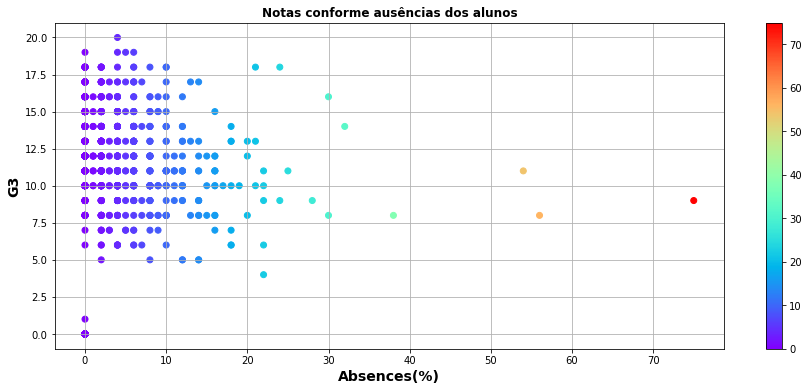

In [38]:
plt.figure(figsize=[15,6])
plt.scatter(dftrain.absences, dftrain.G3,c = dftrain.absences, cmap = plt.cm.rainbow)
plt.xlabel("Absences(%)", fontsize = 14, fontweight = 'bold')
plt.ylabel("G3", fontsize = 14, fontweight = 'bold')
plt.title("Notas conforme ausências dos alunos", fontsize=12, fontweight = 'bold')
plt.colorbar()

plt.grid()
plt.show()

#### Vemos no gráfico acima que quanto menos ausências, melhor a nota do aluno.

## Variáveis categóricas

In [39]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()

In [40]:
dftrain.head(3)

,sex,age,famsize,Pstatus,traveltime,studytime,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,absences,G3
158,M,16,GT3,T,3,1,no,no,no,no,no,no,4,2,2,2,15
40,F,16,LE3,T,2,2,no,yes,no,yes,yes,yes,3,3,3,25,11
942,M,16,LE3,T,1,1,no,no,no,no,yes,no,4,1,2,0,11


In [41]:
var_norm_OHE = ['sex',
                'famsize',
                'Pstatus',
                'schoolsup',
                'famsup',
                'paid',
                'activities',
                'internet',
                'romantic']

In [42]:
dftrain[var_norm_OHE].head(3)

,sex,famsize,Pstatus,schoolsup,famsup,paid,activities,internet,romantic
158,M,GT3,T,no,no,no,no,no,no
40,F,LE3,T,no,yes,no,yes,yes,yes
942,M,LE3,T,no,no,no,no,yes,no


In [43]:
df_OHE = cat_encoder.fit_transform(dftrain[var_norm_OHE]).toarray()
df_OHE

array([[0., 1., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 1.],
       [0., 1., 0., ..., 1., 1., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 1., 0.]])

In [44]:
cat_encoder.categories_

[array(['F', 'M'], dtype=object),
 array(['GT3', 'LE3'], dtype=object),
 array(['A', 'T'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object)]

In [45]:
cat_encoder.inverse_transform(df_OHE)

array([['M', 'GT3', 'T', ..., 'no', 'no', 'no'],
       ['F', 'LE3', 'T', ..., 'yes', 'yes', 'yes'],
       ['M', 'LE3', 'T', ..., 'no', 'yes', 'no'],
       ...,
       ['M', 'GT3', 'T', ..., 'yes', 'no', 'yes'],
       ['M', 'LE3', 'T', ..., 'yes', 'no', 'yes'],
       ['F', 'LE3', 'T', ..., 'yes', 'yes', 'no']], dtype=object)

## Variáveis numéricas - Normalização

In [46]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [47]:
dftrain.head(3)

,sex,age,famsize,Pstatus,traveltime,studytime,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,absences,G3
158,M,16,GT3,T,3,1,no,no,no,no,no,no,4,2,2,2,15
40,F,16,LE3,T,2,2,no,yes,no,yes,yes,yes,3,3,3,25,11
942,M,16,LE3,T,1,1,no,no,no,no,yes,no,4,1,2,0,11


In [48]:
var_norm_SC = ['age',
                'traveltime',
                'studytime',
                'famrel',
                'freetime',
                'goout',
                'absences']

In [49]:
dftrain[var_norm_SC].head(3)

,age,traveltime,studytime,famrel,freetime,goout,absences
158,16,3,1,4,2,2,2
40,16,2,2,3,3,3,25
942,16,1,1,4,1,2,0


In [51]:
df_SC = sc.fit_transform(dftrain[var_norm_SC])
df_SC

array([[-0.56606775,  1.95863332, -1.16195129, ..., -1.14232448,
        -0.98002734, -0.38127822],
       [-0.56606775,  0.62621813,  0.02734003, ..., -0.17431575,
        -0.11490738,  3.19499235],
       [-0.56606775, -0.70619707, -1.16195129, ..., -2.11033322,
        -0.98002734, -0.69225827],
       ...,
       [-0.56606775,  0.62621813,  0.02734003, ...,  0.79369298,
         1.61533255, -0.69225827],
       [-0.56606775, -0.70619707, -1.16195129, ...,  0.79369298,
         0.75021259,  0.24068188],
       [ 0.23980688, -0.70619707,  2.40592268, ..., -1.14232448,
        -0.11490738, -0.38127822]])

In [52]:
#Reconstruindo o dataset.
#A reconstrução se trata das variáveis categóricas tratadas com OHE e as variáveis númericas normalizadas com SC

Xtrain = np.c_[df_OHE, df_SC]

print('Dimensões anteriores do df:',dftrain.shape)
print()
print('Dimensões atuais = do df após tratamento de variáveis categóricas e numéricas:',Xtrain.shape)
Xtrain

Dimensões anteriores do df: (783, 17)

Dimensões atuais = do df após tratamento de variáveis categóricas e numéricas: (783, 25)


array([[ 0.        ,  1.        ,  1.        , ..., -1.14232448,
        -0.98002734, -0.38127822],
       [ 1.        ,  0.        ,  0.        , ..., -0.17431575,
        -0.11490738,  3.19499235],
       [ 0.        ,  1.        ,  0.        , ..., -2.11033322,
        -0.98002734, -0.69225827],
       ...,
       [ 0.        ,  1.        ,  1.        , ...,  0.79369298,
         1.61533255, -0.69225827],
       [ 0.        ,  1.        ,  0.        , ...,  0.79369298,
         0.75021259,  0.24068188],
       [ 1.        ,  0.        ,  0.        , ..., -1.14232448,
        -0.11490738, -0.38127822]])

In [53]:
ytrain = dftrain.G3.values
ytrain.shape

(783,)

#### Ambos os datasets possuem a mesma quantidade de linhas.

## Agrupando em uma função

In [62]:
def preprocessamento_completo(df, dataset_de_treino = True, cat_encoder = None, std_scaler = None):
    #cat_encoder e std_scaler como None significa inicialmente que ainda não foram treinados.

    dff = df.copy() #Cria uma cópia do df
    
    var_norm_OHE = ['sex',
                'famsize',
                'Pstatus',
                'schoolsup',
                'famsup',
                'paid',
                'activities',
                'internet',
                'romantic']
    
    var_norm_SC = ['age',
                'traveltime',
                'studytime',
                'famrel',
                'freetime',
                'goout',
                'absences']

    if dataset_de_treino:  
        
        #OHE
        cat_encoder = OneHotEncoder()
        df_OHE = cat_encoder.fit_transform(dff[var_norm_OHE]).toarray()

        #normalização
        sc = StandardScaler()
        df_SC = sc.fit_transform(dff[var_norm_SC])
        
        X, y =  np.c_[df_OHE, df_SC], dff.G3.values
        return X, y, cat_encoder, sc
    
    else:
        #OHE
        df_OHE = cat_encoder.transform(dff[var_norm_OHE]).toarray()
        
        #normalização
        df_SC = std_scaler.transform(dff[var_norm_SC])
        
        X, y =  np.c_[df_OHE, df_SC], dff.G3.values
        return X, y

In [65]:
Xtrain, ytrain, encoder_train, std_scaler  = preprocessamento_completo(df = dftrain, 
                                                                         dataset_de_treino = True, 
                                                                         cat_encoder = None, 
                                                                         std_scaler = None)

print('Dimensões anteriores do df:',df.shape)
print()
print('Dimensões atuais = do df após tratamento de variáveis categóricas e numéricas:',Xtrain.shape)


Dimensões anteriores do df: (1044, 17)

Dimensões atuais = do df após tratamento de variáveis categóricas e numéricas: (783, 25)


In [67]:
Xtest, ytest  = preprocessamento_completo(df = dftest, 
                                          dataset_de_treino = False,
                                          cat_encoder = encoder_train,
                                          std_scaler = std_scaler)

print('Dimensões anteriores do df:',df.shape)
print()
print('Dimensões atuais = do df após tratamento de variáveis categóricas e numéricas:',Xtest.shape)


Dimensões anteriores do df: (1044, 17)

Dimensões atuais = do df após tratamento de variáveis categóricas e numéricas: (261, 25)


## Machine Learning

In [116]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [69]:
def RMSE(ytrue, ypred):
    return np.sqrt(mean_squared_error(y_true = ytrue, y_pred = ypred))
#y_true e y_pred são parâmetros da função mean_squared_error

In [70]:
lin_reg = LinearRegression()
lin_reg.fit(Xtrain, ytrain)

LinearRegression()

In [71]:
RMSE(ytrue = ytrain, ypred = lin_reg.predict(Xtrain))

3.8350446605862274

In [72]:
r2_score(y_true = ytrain, y_pred=lin_reg.predict(Xtrain))

0.10005909608573449

In [84]:
num_vizinhos = [1, 2, 5, 10, 20, 50]

for n in num_vizinhos:
    knn = KNeighborsRegressor(n_neighbors = n)
    knn.fit(Xtrain, ytrain)
    
    preds = knn.predict(Xtrain)
    
    rmse_train = RMSE(ytrue = ytrain, ypred = preds)
    r2_train = r2_score(y_true = ytrain, y_pred = preds)
    
    print("K = " + str(n) + " | RMSE:" + str(np.round(rmse_train,2)) + " / R2: "+ str(np.round(r2_train, 2)))

K = 1 | RMSE:0.92 / R2: 0.95
K = 2 | RMSE:2.7 / R2: 0.55
K = 5 | RMSE:3.36 / R2: 0.31
K = 10 | RMSE:3.61 / R2: 0.2
K = 20 | RMSE:3.74 / R2: 0.14
K = 50 | RMSE:3.85 / R2: 0.1


In [117]:
max_profundidades = [1, 5, 10, 100]

for m in max_profundidades:
    dt = DecisionTreeRegressor(max_depth = m)
    dt.fit(Xtrain, ytrain)
    
    preds = dt.predict(Xtrain)
    
    rmse_train = RMSE(ytrue = ytrain, ypred = preds)
    r2_train = r2_score(y_true = ytrain, y_pred = preds)
    
    print("Profundidade da árvore = " + str(m) + " | RMSE:" + str(np.round(rmse_train,2)) + " / R2: "+ str(np.round(r2_train, 2)))

Profundidade da árvore = 1 | RMSE:4.0 / R2: 0.02
Profundidade da árvore = 5 | RMSE:3.62 / R2: 0.2
Profundidade da árvore = 10 | RMSE:2.28 / R2: 0.68
Profundidade da árvore = 100 | RMSE:0.72 / R2: 0.97


In [73]:
from sklearn.model_selection import cross_val_score

In [93]:
cv_lin_reg = cross_val_score(estimator = KNeighborsRegressor(n_neighbors = 5), 
                             X = Xtrain, 
                             y = ytrain, 
                             cv = 5, 
                             scoring = 'r2')
print(cv_lin_reg)
print('media: ', cv_lin_reg.mean())
print('desvio padrão: ', cv_lin_reg.std())

[-0.21465684  0.11053895 -0.01104095 -0.0661828  -0.08302854]
media:  -0.05287403266459902
desvio padrão:  0.10555937178183447


In [94]:
cv_lin_reg = cross_val_score(estimator = LinearRegression(), 
                             X = Xtrain, 
                             y = ytrain, 
                             cv = 5, 
                             scoring = 'r2')
print(cv_lin_reg)
print('media: ', cv_lin_reg.mean())
print('desvio padrão: ', cv_lin_reg.std())

[0.02937724 0.07793787 0.08735352 0.02453609 0.06464084]
media:  0.05676911293909472
desvio padrão:  0.025435288596958445


In [101]:
def cross_validation_R2_results(modelo, nome_modelo, X, y, num_folds):
    cv_results = cross_val_score(estimator = modelo, 
                                 X = Xtrain, 
                                 y = ytrain, 
                                 cv = num_folds, 
                                 scoring = 'r2') 
    modelo.fit(Xtrain, ytrain)
    r2_train = r2_score(y_true=ytrain, y_pred=modelo.predict(Xtrain))
    plt.figure(figsize=[8,6])
    plt.scatter(range(1, 1+num_folds), cv_results, c = 'blue', s = 100) #como o nº de folds é 5, o range e de 1 a 6
    #s é o diâmetro do ponto de dispersão
    #plt.scatter está plotando os pontos obtidos
    
    plt.plot(range(1, 1+num_folds), cv_results, c = 'blue', lw = 2, label = 'R2 Fold') #Plotando a reta conforme os pontos
    #lw é a largura da linha
    plt.xticks(range(1, 1+num_folds))
    plt.yticks(np.arange(0, 1.1, 0.1))
    
    plt.plot(range(1, 1+num_folds), [cv_results.mean()] * num_folds, c = 'red', lw = 2, label = 'R2 Cross-val Médio')
    #Plotando a reta que representa a média
    
    plt.plot(range(1, 1+num_folds), [cv_results.mean() + cv_results.std()] * num_folds, '--',
             c = 'gray', lw = 2, label = '+1 desv. padrão margem')
    #Desvio padrão para cima
    
    plt.plot(range(1, 1+num_folds), [cv_results.mean() - cv_results.std()] * num_folds, '--',
             c = 'gray', lw = 2, label = '-1 desv. padrão margem')
    #Desvio padrão para baixo
    
    plt.plot(range(1, 1+num_folds), [r2_train] * num_folds, '--' ,c = 'black', lw = 3, label = 'R2 Treino')
    #r2 calculado
    
    plt.legend(fontsize = 10, bbox_to_anchor = [1.4,1.])
    plt.ylim([0,1.05])
    plt.grid()
    plt.ylabel("R2 Score", fontsize = 14, fontweight = 'bold')
    plt.xlabel("Folds", fontsize = 14, fontweight = 'bold')
    plt.title(nome_modelo + " | R2 TREINO/VAL: "+ str(np.round(r2_train,2)) +" / "+ str(np.round(cv_results.mean(),2)),
              fontsize = 14, fontweight = 'bold')
    plt.show()

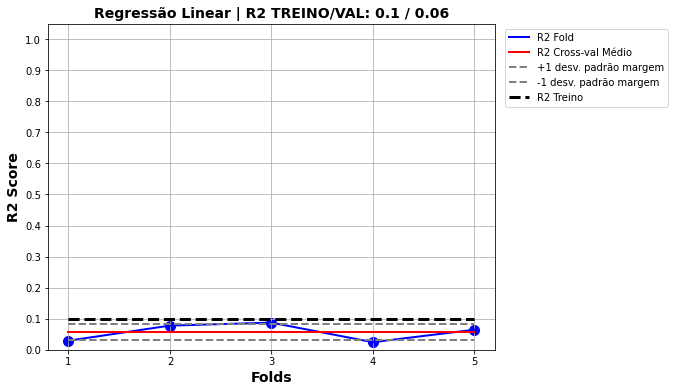

In [102]:
cross_validation_R2_results(modelo = LinearRegression(),
                           nome_modelo = 'Regressão Linear',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

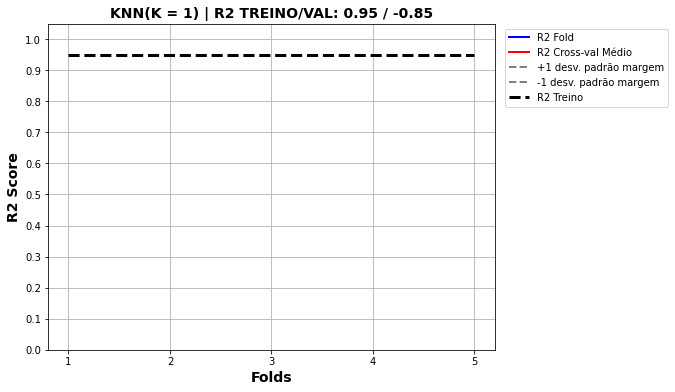

In [104]:
cross_validation_R2_results(modelo = KNeighborsRegressor(n_neighbors = 1),
                           nome_modelo = 'KNN(K = 1)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

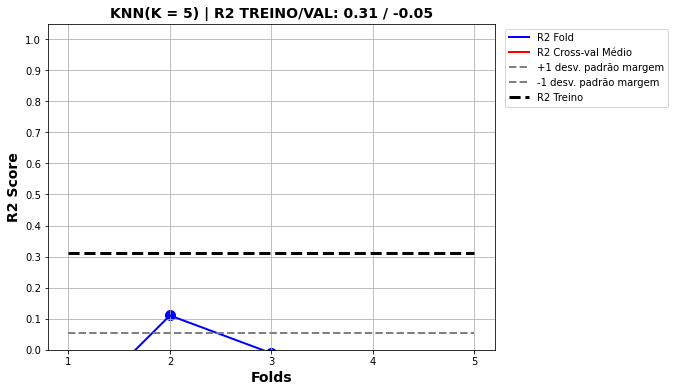

In [105]:
cross_validation_R2_results(modelo = KNeighborsRegressor(n_neighbors = 5),
                           nome_modelo = 'KNN(K = 5)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

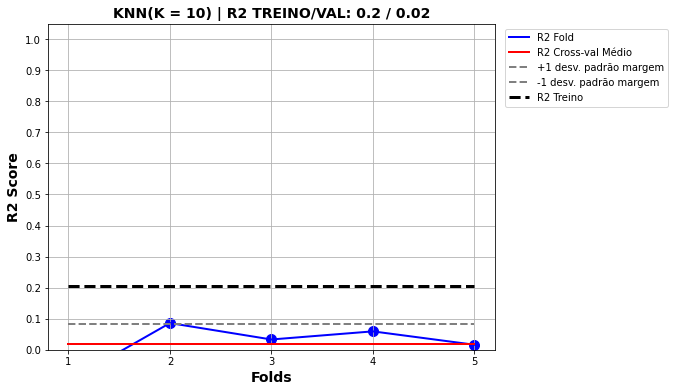

In [106]:
cross_validation_R2_results(modelo = KNeighborsRegressor(n_neighbors = 10),
                           nome_modelo = 'KNN(K = 10)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

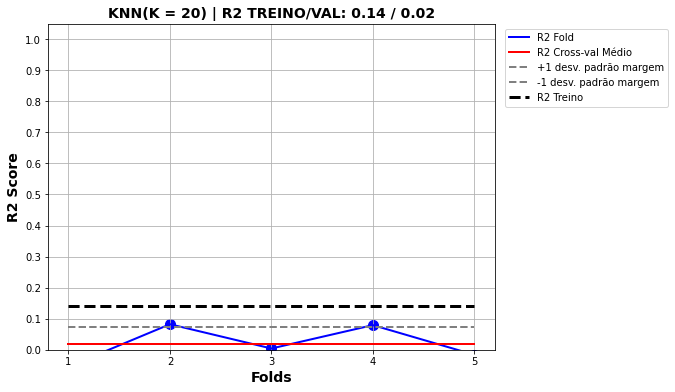

In [107]:
cross_validation_R2_results(modelo = KNeighborsRegressor(n_neighbors = 20),
                           nome_modelo = 'KNN(K = 20)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

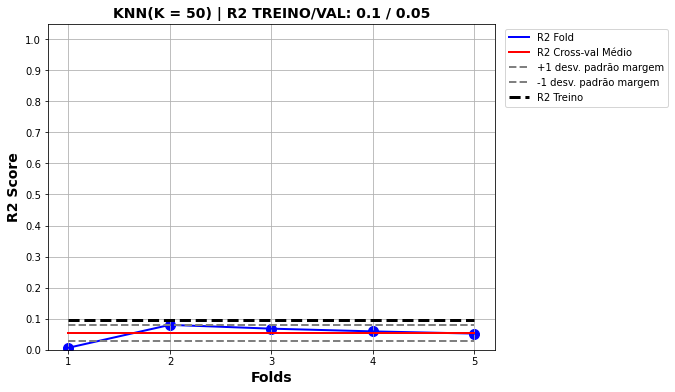

In [108]:
cross_validation_R2_results(modelo = KNeighborsRegressor(n_neighbors = 50),
                           nome_modelo = 'KNN(K = 50)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

#### O modelo trouxe uma predição baixa em relação aos dados reais oferecidos

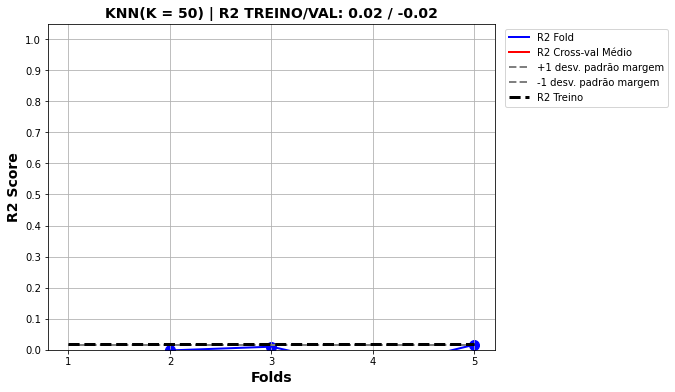

In [118]:
cross_validation_R2_results(modelo = DecisionTreeRegressor(max_depth = 1),
                           nome_modelo = 'KNN(K = 50)',
                           X = Xtrain, 
                           y = ytrain, 
                           num_folds = 5)

#### O valor de r2 em torno de 0,1 não indica um modelo com predições satisfatórias. Existe uma forma de aumentar este valor?

#### O modelo esolhido foi o KNN com 50 vizinhos. Mesmo tendo um r2 igual ao modelo de regressão linear, a média acabou sendo menor, sendo por isso o motivo da escolha.

In [119]:
modelo_final = KNeighborsRegressor(n_neighbors = 10)
modelo_final.fit(Xtrain, ytrain)

#Modelo final instanciado e fitado nos dados de treino

KNeighborsRegressor(n_neighbors=10)

In [120]:
preds_modelo_final = modelo_final.predict(Xtest)

#Modelo final testado nos df de teste

In [121]:
r2_score(y_true = ytest, y_pred = preds_modelo_final)

0.12058737655049812

In [122]:
rmse_teste_final = RMSE(ytrue = ytest, ypred = preds_modelo_final)
rmse_teste_final

3.048603725368304

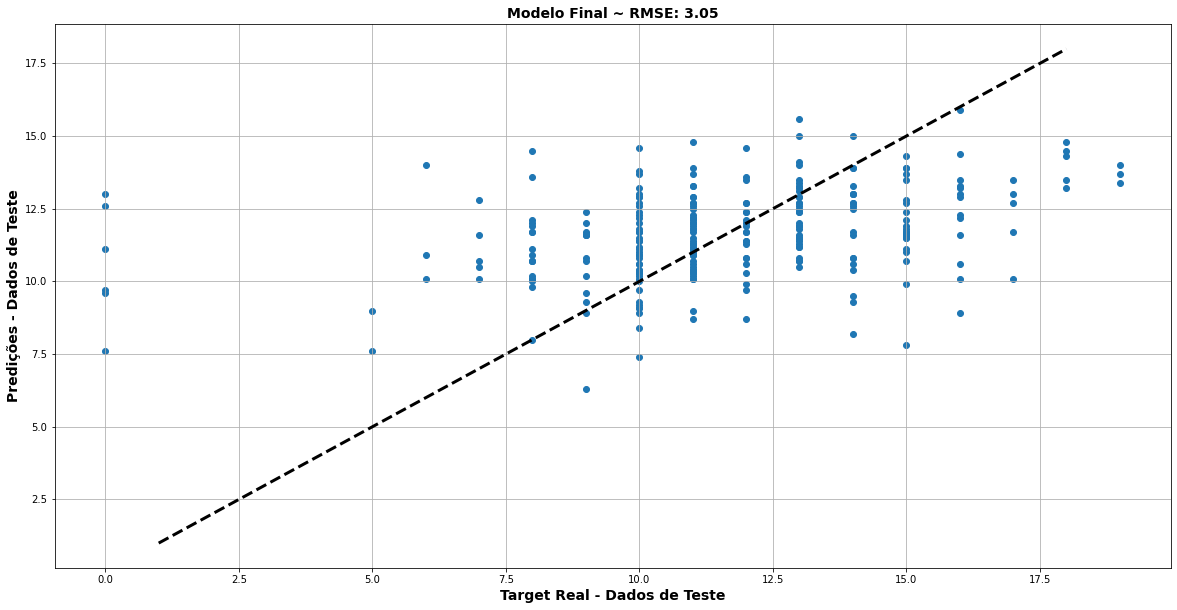

In [123]:
plt.figure(figsize=[20,10])
plt.title("Modelo Final ~ RMSE: " + str(np.round(rmse_teste_final,2)), fontweight = 'bold', fontsize = 14)
plt.scatter(ytest, preds_modelo_final)
plt.xlabel("Target Real - Dados de Teste", fontweight = 'bold', fontsize = 14)
plt.ylabel("Predições - Dados de Teste", fontweight = 'bold', fontsize = 14)
plt.grid()
range_line = int(np.maximum(max(ytest), max(preds_modelo_final)))
plt.plot(range(1, range_line), range(1, range_line), '--' ,c = 'black', lw = 3)
plt.show()

#### O modelo final não foi capaz de prever com muita precisão os dados. 